In [0]:
1. Defining the Question
#The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.
#The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,
#while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [0]:
 Specifying the question
#how we can predict which individuals are most likely to have or use a bank account.

In [0]:
b) Defining the Metric for Success
The question objectives:

1) Exploratory Data Analysis
2)Visualizations

3)Univariate, Bivariate and Multivariate analysis

4)Reduction techniques(PCA)

In [0]:
c) Understanding the context
Overview

#Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
#For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access
#to or use a commercial bank account.
#Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. 
#Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions,
#banks still play a pivotal role in facilitating access to financial services. 
#Access to bank accounts enables households to save and facilitate payments 
#while also helping businesses build up their credit-worthiness and improve their access to other financial services.
#Therefore, access to bank accounts is an essential contributor to long-term economic growth.

In [0]:
d) Recording the Experimental Design
In order to work on the above problem, you need to do the following:

1.Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

2.Find and deal with outliers, anomalies, and missing data within the dataset.

3.Plot univariate and bivariate summaries recording your observations.

4.Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

5.Challenge your solution by providing insights on how you can make improvements

In [0]:
e) Data Relevance
#The main dataset contains demographic information and what financial services are used by individuals across East Africa.
#This data was extracted from various Finscope surveys ranging from 2016 to 2018 
#FinAccess Kenya 2018. [Link] (Links to an external site.)
#Finscope Rwanda 2016. [Link] (Links to an external site.)
#Finscope Tanzania 2017. [Link] (Links to an external site.)
#Finscope Uganda 2018. [Link] (Links to an external site.)
#Dataset Files: http://bit.ly/FinancialDataset
#variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas

In [0]:
#Reading dataset
finance = pd.read_csv('/content/Financial Dataset - 1.csv')


In [153]:
#previewing the first five dataset
finance.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [154]:
#previewing the last 5 columns
finance.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [155]:
#cleaning data using strip(),lower(), replace()
finance.columns =finance.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(finance.columns)

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')


In [156]:
#Renaming the columns
finance.rename(columns={'level_of_educuation':'level_of_education'}, inplace = True)
finance.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace = True)
finance.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [157]:
finance.shape

(23524, 13)

In [158]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23510 non-null  object 
 1   year                        23524 non-null  int64  
 2   uniqueid                    23524 non-null  object 
 3   has_a_bank_account          23488 non-null  object 
 4   type_of_location            23509 non-null  object 
 5   cell_phone_access           23513 non-null  object 
 6   household_size              23496 non-null  float64
 7   respondent_age              23490 non-null  float64
 8   gender_of_respondent        23490 non-null  object 
 9   the_relationship_with_head  23520 non-null  object 
 10  marital_status              23492 non-null  object 
 11  level_of_education          23495 non-null  object 
 12  type_of_job                 23494 non-null  object 
dtypes: float64(2), int64(1), object

In [0]:
           Tidying the Dataset

In [0]:
#Dropping unnecessary columns
#In our case it's unique Id. It doesn't relate to our research question.
finance = finance.drop(['uniqueid'], axis=1)

In [160]:
# confirm if the column has been saved
finance.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [0]:
           Missing variables

In [161]:
finance.isna().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [0]:
finance = finance.dropna()

In [164]:
# confirm if the missing valuables have been dropped
finance.isna().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

In [165]:
# new dataset shape
finance.shape

(23343, 12)

In [166]:
#cleaning data using strip(),lower(), replace()
finance.columns = finance.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(finance.columns)

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')


In [168]:
#Renaming columns
finance.rename(columns={'level_of_educuation':'level_of_education'}, inplace = True)
finance.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace = True)
finance.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [169]:
finance['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [170]:
finance['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

In [171]:
finance['respondent_age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

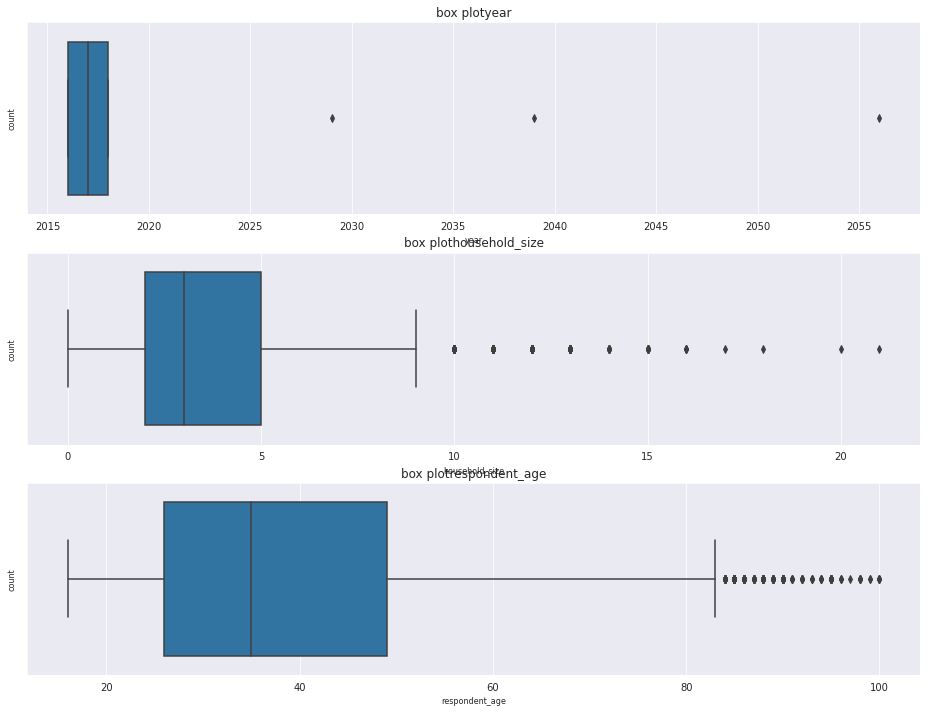

In [172]:
#checking for outliers using box plot
#Boxplot shows that between the ages of 80-100 there are outliers as they are not included in the box of other observation
col_names= ['year', 'household_size', 'respondent_age']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  sns.boxplot(finance[col_val], ax=ax[i])
  ax[i].set_title ('box plot'+col_val, fontsize= 12)
  ax[i].set_xlabel(col_val, fontsize= 8)
  ax[i].set_ylabel('count', fontsize= 8)
plt.show()

In [0]:
#The data description of the year column (Year survey was done in) only included(2016,2017,2018)
#We have to remove the anomalies
indexnames = finance[finance['year'] > 2018].index

finance.drop(indexnames, inplace = True)

In [0]:
                          UNIVARIATE ANALYSIS

In [176]:
#                 Categorical variables
# Creating our frequency table using value counts
finance.has_a_bank_account.value_counts()

No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64

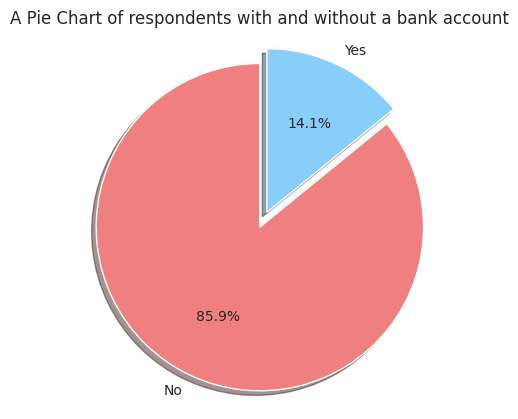

In [177]:
#Create a pie chart to indicate the has_a_bank_account column
column= finance.has_a_bank_account.value_counts()
column

# accessing the data to plot

# labels
sizes= column.index
sizes

# values
column_value = column.values
column_value
# Colors
colors = ['lightcoral', 'lightskyblue']
# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(column_value, labels = sizes,colors= colors, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account')
plt.show()

#The pie chart only 14.1% of respondents have a bank account.85.9% do not.

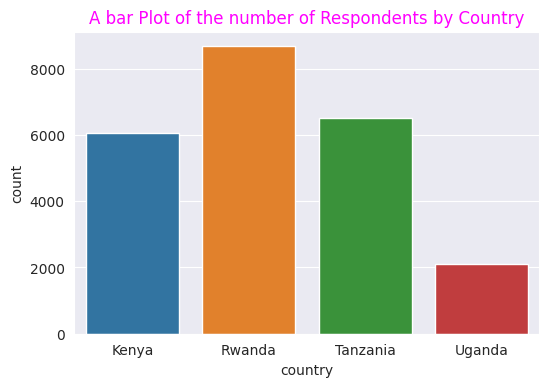

In [178]:
# Plotting a bar plot of the respondent country 
#Rwanda had the highest number of respondents

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(finance.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()


In [0]:
                  Numerical variables

In [179]:
#Calculating the age most respondents are.
# Most respondents are 30 years of age.
finance['respondent_age'].mode()


0    30.0
dtype: float64

In [180]:
finance.head(5)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Text(0.5, 1.0, 'Histogram showing household size with a bank account')

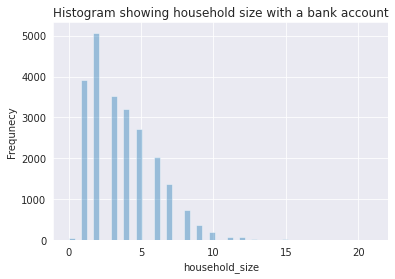

In [182]:
#Histogram to show relationship between household size and having a bank account
#Histogram shows most households size 3 have highest number of bank accounts
df = finance[finance.has_a_bank_account == 'Yes']
sns.distplot(finance['household_size'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing household size with a bank account')

Text(0.5, 1.0, 'Histogram showing respondents age with a bank account')

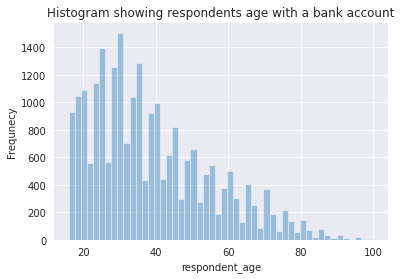

In [183]:
#Histogram to show relationship between age and having a bank account
# From the histogram, people who are 30 years of age have most bank accounts
df = finance[finance.has_a_bank_account == 'Yes']
sns.distplot(finance['respondent_age'],  kde=False,label='Yes')
plt.ylabel('Frequnecy')
plt.title('Histogram showing respondents age with a bank account')

In [0]:
                     Bivariate Analysis


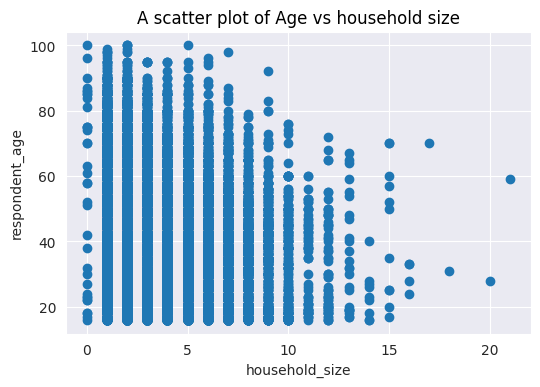

In [185]:
#1)Numerical to numerical
#scatter plot
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(finance['household_size'], finance['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'black')

# Labelling the x -axis
plt.xlabel('household_size')

# Labelling the y- axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()

In [186]:
Correlation
#It is a statistical measure that describes the association between random variables.
#Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.
#Positive correlation is a relationship between two variables in which both variables move in the same direction.
#Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions.
#Correlation coefficients between -/+0.7 to -/+0.9 are generally considered strong,
#Between -/+0.4 to -/+ 0.6 are considered moderate,
#-/+0.1 to -/+0.3 are considered strong.
# Calculating the pearson coefficient of the entire dataframe
finance.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


In [188]:
# Calculating the pearson coefficient
#They have a very moderate negative correlation
pearson_coeff = finance["household_size"].corr(finance["year"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = finance["household_size"].corr(finance["year"]) 
print(coeff)

-0.05248406515317324
-0.05248406515317324


In [187]:
# Calculating the pearson coefficient
#They have a very strong negative correlation
pearson_coeff = finance["household_size"].corr(finance["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = finance["household_size"].corr(finance["respondent_age"]) 
print(coeff)

-0.1196711523415487
-0.1196711523415487


In [0]:
               MULTIVARIATE ANALYSIS

In [189]:
#Focus is on analyzing more than 2 statistical variables at once.
#To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)
#Pandas has a function which can turn a categorical variable into a series of zeros and ones,
#This makes them a lot easier to quantify and compare.

# We use pd.get_dummies that creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(finance[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()


,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [191]:
# concatenating 

df = pd.concat([finance, dummy], axis = 1)
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
               REDUCTION TECHNIQUE

In [0]:
#PCA
#a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum 
#information about the dataset
# Drop all categorical variables
# Start preprocessing step
# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = df.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = df['has_a_bank_account']


In [196]:
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [198]:
X.shape

(23340, 39)

In [199]:
# confirm for y variable too
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

In [0]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
#Standardizing. StandardScaler subtracts the mean from each features and then scale to unit variance.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.
# The transform method returns the specified number of principal components.
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [212]:
#Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1067479])

In [213]:
pca.n_components_


1

In [0]:
# Using the Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)

In [216]:
print(y_pred)


['No' 'No' 'No' ... 'No' 'No' 'No']


In [217]:
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



# From the output we see that with only one feature, 
# the random forest algorithm is able to correctly predict 4036 out of 4668 instances, 
# resulting in 86.46% accuracy.

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [0]:
                   #FINAL SOLUTION
#If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable. 
# there is insufficient evidence to conclude that there is effect at the population level.